# Author- Gududuru Pruthvidha

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [6]:
#read the data
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
advertising.shape

(200, 4)

In [8]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

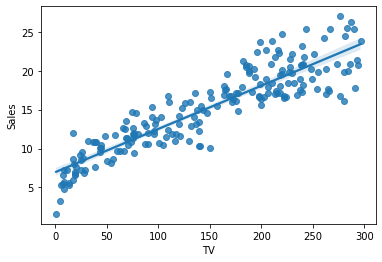

In [16]:
#Visualize the data 
sns.regplot(x='TV', y='Sales', data=advertising)

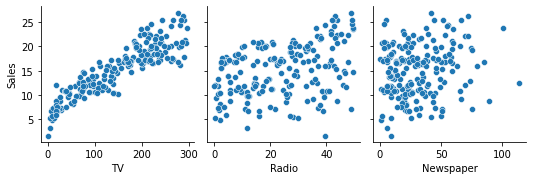

In [23]:
sns.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

In [24]:
advertising.corr()
#sns.heatmap()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

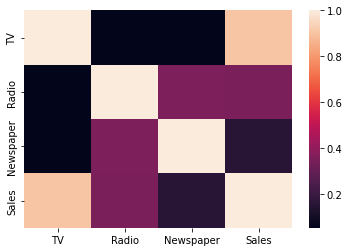

In [25]:
sns.heatmap(advertising.corr())

<AxesSubplot:>

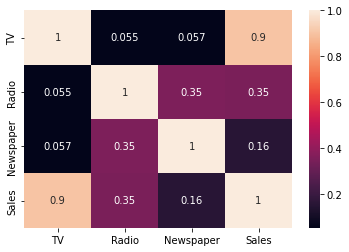

In [26]:
sns.heatmap(advertising.corr(), annot=True)

In [10]:
#create x and y
x=advertising['TV']
y=advertising['Sales']

In [20]:
#train test-split
x_train, x_test,y_train, y_test= train_test_split(x, y, train_size=0.70, random_state=100)


In [22]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [24]:
#training the model
x_train_sm = sm.add_constant(x_train)
x_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [25]:
#fitting the model
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           1.52e-52
Time:                        11:33:19   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 1.coef and p-value
# 2.R-Squared = 81.6%, very high
# 3.p(F-statistic) is low => the fit is not by chance

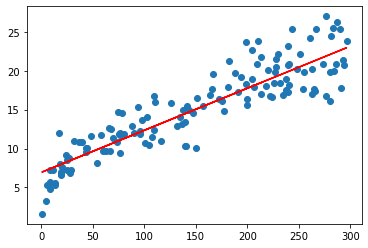

In [32]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [ ]:
# error =f(y_train, y_train_pred)

In [35]:
res = y_train - y_train_pred

C:\Users\pruth\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual plot')

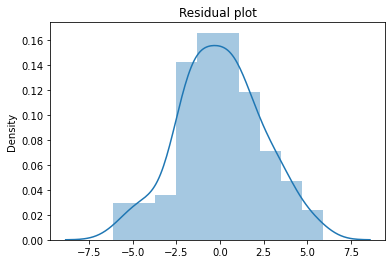

In [38]:
# plot the residuals
plt.figure()
sns.distplot(res)
plt.title("Residual plot")


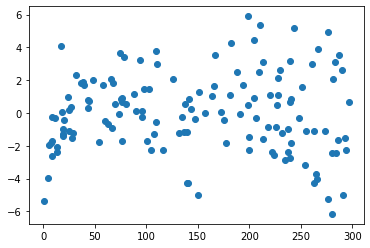

In [39]:
#look for patterns in residuals(we should not be able to identify)
plt.scatter(x_train, res)
plt.show()

In [40]:
# predictions on the test set(y_test_pred)
# evuluate the model, r-squared on the test

In [41]:
#add a cons/intercept to test
x_test_sm = sm.add_constant(x_test)

# pred on test
y_test_pred = lr_model.predict(x_test_sm)

In [50]:
# evuluate the model, r-squared, on the test
# r-squared
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.792103160124566

In [52]:
# r2 on train
r2_score(y_true = y_test, y_pred = y_test_pred)

0.792103160124566

In [53]:
# mean squared error
mean_squared_error(y_true = y_test, y_pred = y_test_pred)

4.077556371826953

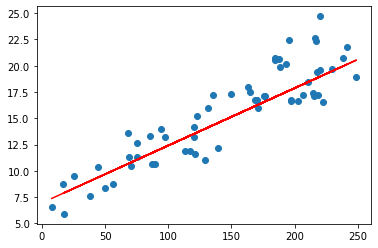

In [54]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

In [55]:
#train test-split
x_train, x_test,y_train, y_test= train_test_split(x, y, train_size=0.70, random_state=100)

In [81]:
#reshape x_train to (140, 1)
x_train_lm = x_train.values.reshape(-1, 1)
x_test_lm = x_test.values.reshape(-1, 1)

In [82]:
# steps in sklearn model building

# 1. create an object of linear regression
lm = LinearRegression()

# 2. fit the model
lm.fit(x_train_lm, y_train)

LinearRegression()

In [62]:
# 3.see the params, make predictions (train, test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [72]:
# make predictions
y_train_pred = lm.predict(x_train_lm)
y_test_pred = lm.predict(x_test_lm)

In [76]:
# 4. evuluate the model
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8157933136480389
0.7921031601245662
